In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dataset=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\pandas\skillcraft\bank.csv",sep=";")
dataset.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
dataset.shape

(4521, 17)

In [8]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [11]:
cols= dataset.select_dtypes(include='object').columns

In [16]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
lb=LabelEncoder()
for i in cols:
  dataset[i]=lb.fit_transform(dataset[i])

In [18]:
x=dataset.drop("y",axis=1)
y=dataset["y"]

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
mn=MinMaxScaler()
x=pd.DataFrame(mn.fit_transform(x),columns=x.columns)

In [35]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.161765,0.909091,0.5,0.000000,0.0,0.068455,0.0,0.0,0.0,0.600000,0.909091,0.024826,0.000000,0.000000,0.00,1.000000
1,0.205882,0.636364,0.5,0.333333,0.0,0.108750,1.0,1.0,0.0,0.333333,0.727273,0.071500,0.000000,0.389908,0.16,0.000000
2,0.235294,0.363636,1.0,0.666667,0.0,0.062590,1.0,0.0,0.0,0.500000,0.000000,0.059914,0.000000,0.379587,0.04,0.000000
3,0.161765,0.363636,0.5,0.666667,0.0,0.064281,1.0,1.0,1.0,0.066667,0.545455,0.064548,0.061224,0.000000,0.00,1.000000
4,0.588235,0.090909,0.5,0.333333,0.0,0.044469,1.0,0.0,1.0,0.133333,0.727273,0.073486,0.000000,0.000000,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0.636364,0.5,0.333333,0.0,0.039999,1.0,0.0,0.0,0.966667,0.454545,0.107580,0.081633,0.000000,0.00,1.000000
4517,0.558824,0.545455,0.5,0.666667,1.0,0.000000,1.0,1.0,1.0,0.266667,0.727273,0.049321,0.000000,0.000000,0.00,1.000000
4518,0.558824,0.818182,0.5,0.333333,0.0,0.048429,0.0,0.0,0.0,0.600000,0.090909,0.048659,0.204082,0.000000,0.00,1.000000
4519,0.132353,0.090909,0.5,0.333333,0.0,0.059731,0.0,0.0,0.0,0.166667,0.272727,0.041377,0.061224,0.243119,0.12,0.333333


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=5,splitter='random')

dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

In [55]:
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(90.45907079646017, 89.94475138121547)

In [56]:
from sklearn.model_selection import GridSearchCV
df={"criterion":["gini", "entropy", "log_loss"],"splitter":["best", "random"],"max_depth":[i for i in range(2,20)]}
gd=GridSearchCV(DecisionTreeClassifier(),param_grid=df)

In [57]:
gd.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'splitter': ['best', 'random']})

In [58]:
gd.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'splitter': 'random'}

In [59]:
gd.best_score_

np.float64(0.8976761957161304)

<Axes: >

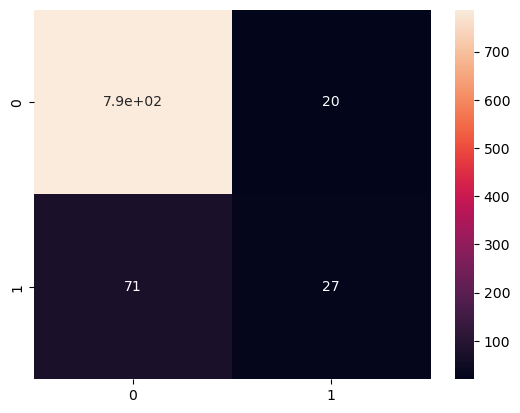

In [63]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=dt.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)


In [ ]:
print()